# Criando nomes

In [64]:
import pandas as pd

In [65]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [66]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [67]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [68]:
frames = [nomes_f, nomes_m]

In [69]:
nomes = pd.concat(frames)['nome'].to_frame()

In [70]:
nomes.sample(5)

,nome
137,NAIR
199,GEOVANE
54,REGINA
63,MIGUEL
147,LILIAN


# incluindo ID dos alunos

In [71]:
import numpy as np
np.random.seed(123)

In [72]:
total_alunos = len(nomes)
total_alunos

400

In [73]:
nomes["id_alunos"] = np.random.permutation(total_alunos) + 1 

In [74]:
nomes.sample(5)

,nome,id_alunos
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [75]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)


In [76]:
nomes.sample(5)

,nome,id_alunos,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [77]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [78]:
nomes.sample(5)

,nome,id_alunos,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Incluindo a Tabela Cursos

In [79]:
!pip3 install html5lib
!pip3 install lxml

In [80]:
import html5lib

In [81]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [82]:
type(cursos)

list

In [83]:
cursos = cursos[0]

In [84]:
type(cursos)

pandas.core.frame.DataFrame

In [85]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Alterando index de cursos

In [86]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [87]:
cursos.head(10)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [88]:
cursos['id'] = cursos.index + 1 

In [89]:
cursos.head(10)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [90]:
cursos = cursos.set_index('id')

In [91]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando Alunos nos cursos

In [92]:
nomes.sample(5)

,nome,id_alunos,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [93]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)* 1.5).astype(int)

In [94]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1


In [95]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [96]:
import seaborn as sns

<AxesSubplot:xlabel='matriculas', ylabel='Count'>

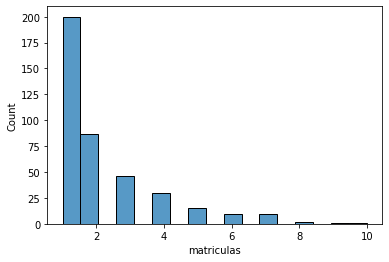

In [97]:
sns.histplot(nomes.matriculas)

In [98]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
6       9
7       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

In [99]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,2


# Selecionando cursos

In [100]:
todas_matriculas = []
x = np.random.rand(20)
prob = x  / sum(x)

In [101]:
for index, row in nomes.iterrows():
    id = row.id_alunos
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])        
        

In [102]:
matriculas.head(10)

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12
5,43,13
6,304,16
7,156,11
8,343,17
9,310,11


In [103]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [104]:
nomes.sample(3)

,nome,id_alunos,dominio,email,matriculas
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,2
90,ANDRESSA,213,@servicodoemail.com,andressa@servicodoemail.com,1
191,ERICK,124,@dominiodoemail.com.br,erick@dominiodoemail.com.br,1


In [105]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [106]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [107]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [108]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python


# Diferentes Saídas

In [109]:
matriculas_json = matriculas_por_curso.to_json()

In [110]:
matriculas_json

'{"quantidade_de_alunos":{"1":59,"2":31,"3":53,"4":4,"5":12,"6":75,"7":32,"8":18,"9":59,"10":40,"11":61,"12":66,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":75,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [111]:
matriculas_html = matriculas_por_curso.to_html()

In [112]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>59</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>31</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>53</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>4</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>12</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>75</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>32</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>18</td>\n      <td>Novas integrações com Java</td>\n 

In [113]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>59</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>75</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

In [114]:
matriculas_por_curso.to_csv('matriculas_por_nome.csv', index = False)

# Criando o banco SQL 

In [115]:
!pip install sqlalchemy

In [116]:
from sqlalchemy import create_engine, MetaData, Table

In [117]:
engine = create_engine('sqlite:///:memory:')

In [118]:
engine

Engine(sqlite:///:memory:)

In [119]:
type(engine)

sqlalchemy.engine.base.Engine

In [120]:
matriculas_por_curso.to_sql('matriculas', engine)

In [121]:
print(engine.table_names())

['matriculas']


# Buscando na Base SQL 

In [122]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [123]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [124]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,59
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,75
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,40


In [125]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [126]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [127]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,75
18,Boas práticas em Java,75


# Escrevendo no Banco 

In [128]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [129]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [130]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [131]:
matriculas

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12
...,...,...
854,383,12
855,366,1
856,366,19
857,366,10


In [132]:
id_curso = 15 
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
18,92,15
35,163,15
36,42,15
76,328,15
83,350,15
167,246,15
177,179,15
186,221,15
205,166,15
225,148,15


In [133]:
proxima_turma.shape[0]

46

In [134]:
nomes.sample(3)

,nome,id_alunos,dominio,email,matriculas
137,NAIR,129,@servicodoemail.com,nair@servicodoemail.com,2
199,GEOVANE,366,@servicodoemail.com,geovane@servicodoemail.com,4
54,REGINA,281,@dominiodoemail.com.br,regina@dominiodoemail.com.br,1


In [135]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_alunos'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
92,15,ALINE,@dominiodoemail.com.br,aline@dominiodoemail.com.br,2
163,15,LUCIANA,@dominiodoemail.com.br,luciana@dominiodoemail.com.br,3
42,15,VANESSA,@dominiodoemail.com.br,vanessa@dominiodoemail.com.br,1
328,15,RENATA,@servicodoemail.com,renata@servicodoemail.com,5
350,15,CRISTIANE,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
246,15,LAURA,@servicodoemail.com,laura@servicodoemail.com,5
179,15,TAIS,@dominiodoemail.com.br,tais@dominiodoemail.com.br,4
221,15,HELENA,@dominiodoemail.com.br,helena@dominiodoemail.com.br,2
166,15,ROSANA,@servicodoemail.com,rosana@servicodoemail.com,3


In [136]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_alunos'))['nome']

id_aluno
92         ALINE
163      LUCIANA
42       VANESSA
328       RENATA
350    CRISTIANE
246        LAURA
179         TAIS
221       HELENA
166       ROSANA
148        THAIS
261      MARCELA
197    ELIZABETE
72      GABRIELE
129         NAIR
286       RAISSA
308      REGIANE
62        EUNICE
90      CLEONICE
317    ALEXANDRA
375         MARA
168      IRACEMA
282      MARILIA
319         INES
346       LURDES
264       TERESA
125         LUIS
311        ANDRE
327    GUILHERME
339       THIAGO
186       FLAVIO
64      HENRIQUE
392       NELSON
89          JEAN
257      ADILSON
134       GILSON
266        CELSO
104       MILTON
57       EDILSON
305       ADEMIR
313      EDVALDO
256       RUBENS
378         HUGO
332    APARECIDO
169       GERSON
351      EMANUEL
209         RIAN
Name: nome, dtype: object

In [137]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_alunos'))['nome'].to_frame()

,nome
id_aluno,
92,ALINE
163,LUCIANA
42,VANESSA
328,RENATA
350,CRISTIANE
246,LAURA
179,TAIS
221,HELENA
166,ROSANA


In [138]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Análise de dados
Name: 15, dtype: object

In [139]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Análise de dados'

In [140]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_alunos'))['nome'].to_frame()

In [141]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [142]:
proxima_turma

,Alunos do curso de Análise de dados
id_aluno,
92,ALINE
163,LUCIANA
42,VANESSA
328,RENATA
350,CRISTIANE
246,LAURA
179,TAIS
221,HELENA
166,ROSANA


# Excel 

In [143]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)